In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import normalize

In [2]:
# importing Dataset
data=pd.read_csv('C:/Users/shrey/Downloads/Assignment/7.Clustering/crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


<AxesSubplot:>

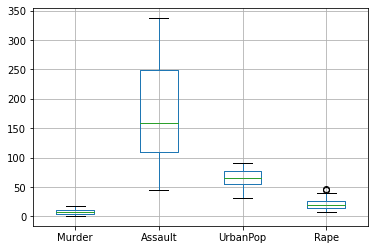

In [5]:
data.boxplot()

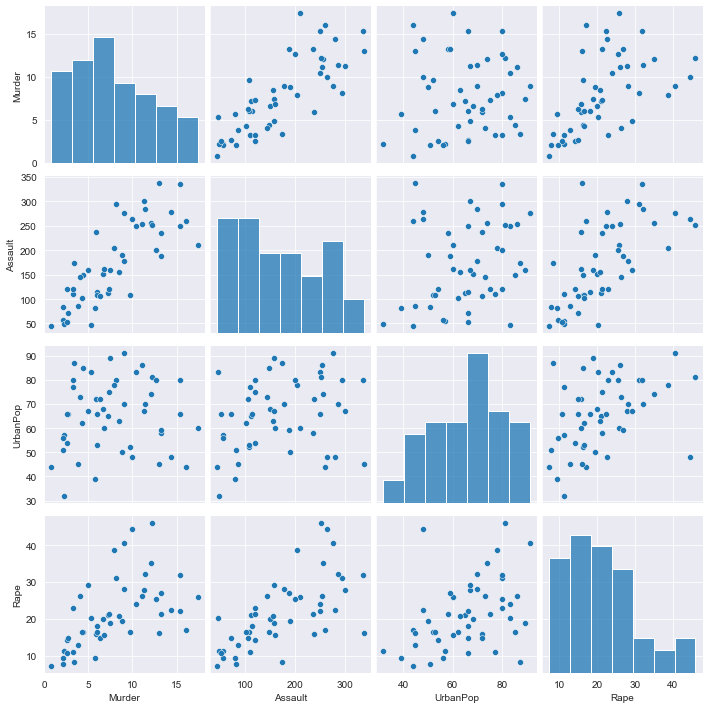

In [7]:
sn.set_style(style='darkgrid')
sn.pairplot(data)

In [9]:
# Normalize heterogenous numerical data 
data_norm=pd.DataFrame(normalize(data),columns=data.columns)
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


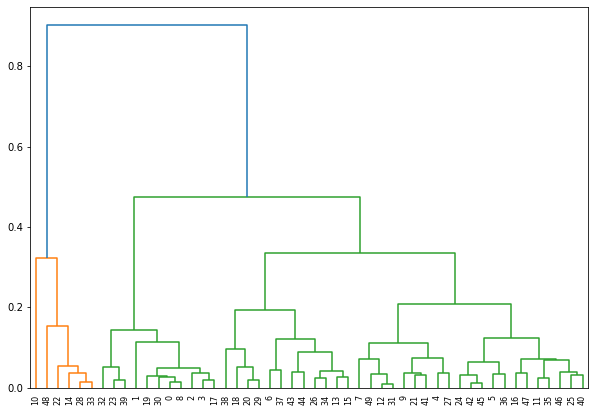

In [10]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data_norm,'complete'))

In [11]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [12]:
y=pd.DataFrame(hclusters.fit_predict(data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
1    12
3    12
2     5
4     1
Name: clustersid, dtype: int64

In [15]:
# Adding clusters to dataset
data['clustersid']=hclusters.labels_
data.head()

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [16]:
data.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


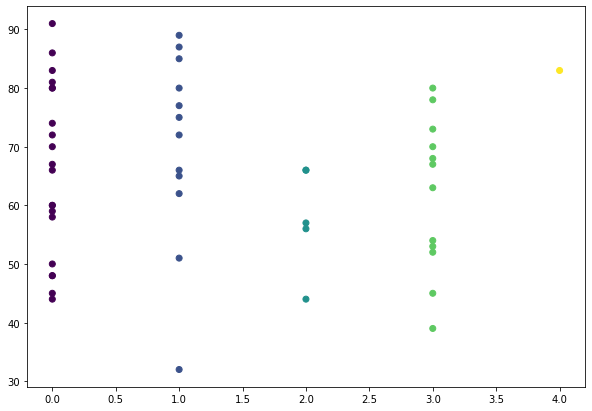

In [17]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['UrbanPop'], c=hclusters.labels_)